In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pptoolbox.visualization import initialize_theme
cmaps = initialize_theme()

# import and preprocess

In [96]:
sql_date = 241230

In [97]:
label_df = pd.read_csv(f'../data/raw/label_num_{sql_date}.csv')

In [98]:
label_df.head()

,lot_id,lot_name,property_name,property_value,company_id,product_type_id,product_name
0,74093,Expt A_EP_LAC_1-T2,Milk,7.385,1286,6643,SMP
1,74093,Expt A_EP_LAC_1-T2,Sweet,7.149,1286,6643,SMP
2,74093,Expt A_EP_LAC_1-T2,Salty,4.167,1286,6643,SMP
3,74093,Expt A_EP_LAC_1-T2,Acidic,2.031,1286,6643,SMP
4,74093,Expt A_EP_LAC_1-T2,Cooked,1.541,1286,6643,SMP


In [99]:
label_df = label_df.pivot(index=['lot_id','lot_name'],columns='property_name',values='property_value').reset_index().set_index('lot_id')
label_df

property_name,lot_name,Acidic,Animal Shed,Cardboard,Cheese,Cooked,Herbal,Milk,Oxidised,Salty,Sweet
lot_id,,,,,,,,,,,
74093,Expt A_EP_LAC_1-T2,2.031,1.110,1.295,1.179,1.541,1.100,7.385,1.318,4.167,7.149
74094,Expt A-EP_LAC_2-T2,1.654,1.349,1.192,1.195,1.295,1.115,7.523,1.282,4.118,7.282
74095,Expt A-EP_LAC_3-T2,1.488,1.045,1.248,1.113,1.400,1.085,7.368,1.215,4.048,7.350
74096,Expt A-EP_PER_1-T2,1.764,1.333,1.282,1.308,1.515,1.133,7.256,1.374,4.469,6.941
74097,Expt A-EP_PER_2-T2,1.783,1.138,1.228,1.363,1.568,1.125,7.113,1.340,4.573,6.765
74098,Expt A-EP_PER_3-T2,1.720,1.233,1.415,1.378,1.598,1.063,7.055,1.418,4.393,6.950
74099,Expt A-IN_LAC_1-T2,1.695,1.224,1.278,1.259,1.384,1.181,7.365,1.281,4.243,7.205
74100,Expt A-IN_LAC_2-T2,1.724,1.232,1.349,1.249,1.635,1.154,7.135,1.397,4.200,7.159
74101,Expt A-IN_LAC_3-T2,1.732,1.135,1.297,1.284,1.473,1.124,7.308,1.205,4.424,7.232


In [100]:
label_df[['EPINMT', 'LACPER', 'Replicate', 'Month']] = label_df['lot_name'].str.extract(r'[^-_]*[-_]([^-_]*)[-_]([^-_]*)[-_]([^-_]*)[-_\s]T([\d]*)')
label_df['Month'] = label_df['Month'].astype(int)
label_df

property_name,lot_name,Acidic,Animal Shed,Cardboard,Cheese,Cooked,Herbal,Milk,Oxidised,Salty,Sweet,EPINMT,LACPER,Replicate,Month
lot_id,,,,,,,,,,,,,,,
74093,Expt A_EP_LAC_1-T2,2.031,1.110,1.295,1.179,1.541,1.100,7.385,1.318,4.167,7.149,EP,LAC,1,2
74094,Expt A-EP_LAC_2-T2,1.654,1.349,1.192,1.195,1.295,1.115,7.523,1.282,4.118,7.282,EP,LAC,2,2
74095,Expt A-EP_LAC_3-T2,1.488,1.045,1.248,1.113,1.400,1.085,7.368,1.215,4.048,7.350,EP,LAC,3,2
74096,Expt A-EP_PER_1-T2,1.764,1.333,1.282,1.308,1.515,1.133,7.256,1.374,4.469,6.941,EP,PER,1,2
74097,Expt A-EP_PER_2-T2,1.783,1.138,1.228,1.363,1.568,1.125,7.113,1.340,4.573,6.765,EP,PER,2,2
74098,Expt A-EP_PER_3-T2,1.720,1.233,1.415,1.378,1.598,1.063,7.055,1.418,4.393,6.950,EP,PER,3,2
74099,Expt A-IN_LAC_1-T2,1.695,1.224,1.278,1.259,1.384,1.181,7.365,1.281,4.243,7.205,IN,LAC,1,2
74100,Expt A-IN_LAC_2-T2,1.724,1.232,1.349,1.249,1.635,1.154,7.135,1.397,4.200,7.159,IN,LAC,2,2
74101,Expt A-IN_LAC_3-T2,1.732,1.135,1.297,1.284,1.473,1.124,7.308,1.205,4.424,7.232,IN,LAC,3,2


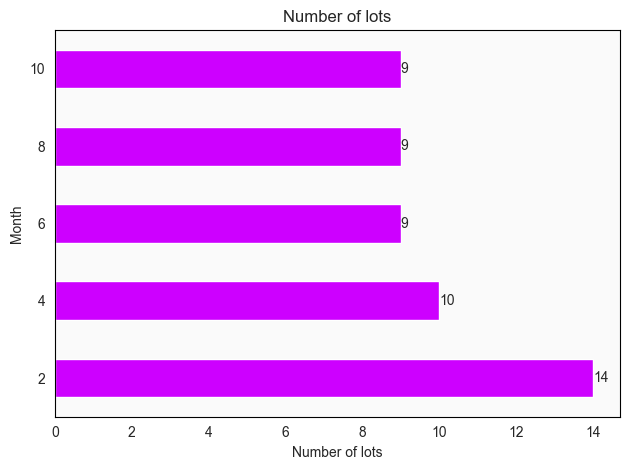

In [101]:
ax = label_df.value_counts('Month').sort_index().plot(kind='barh')
ax.set_xlabel('Number of lots')
ax.bar_label(ax.containers[0])
ax.title.set_text('Number of lots')

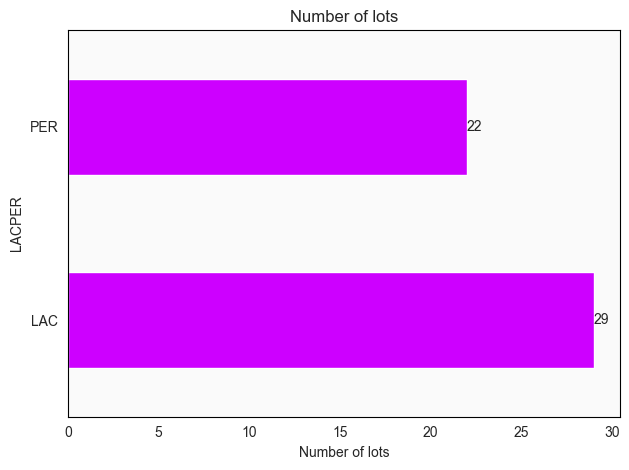

In [102]:
ax = label_df.value_counts('LACPER').sort_index().plot(kind='barh')
ax.set_xlabel('Number of lots')
ax.bar_label(ax.containers[0])
ax.title.set_text('Number of lots')

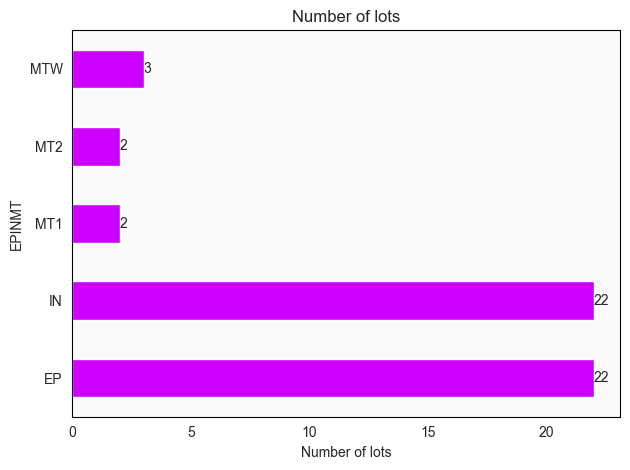

In [103]:
ax = label_df.value_counts('EPINMT').sort_index().plot(kind='barh')
ax.set_xlabel('Number of lots')
ax.bar_label(ax.containers[0])
ax.title.set_text('Number of lots')

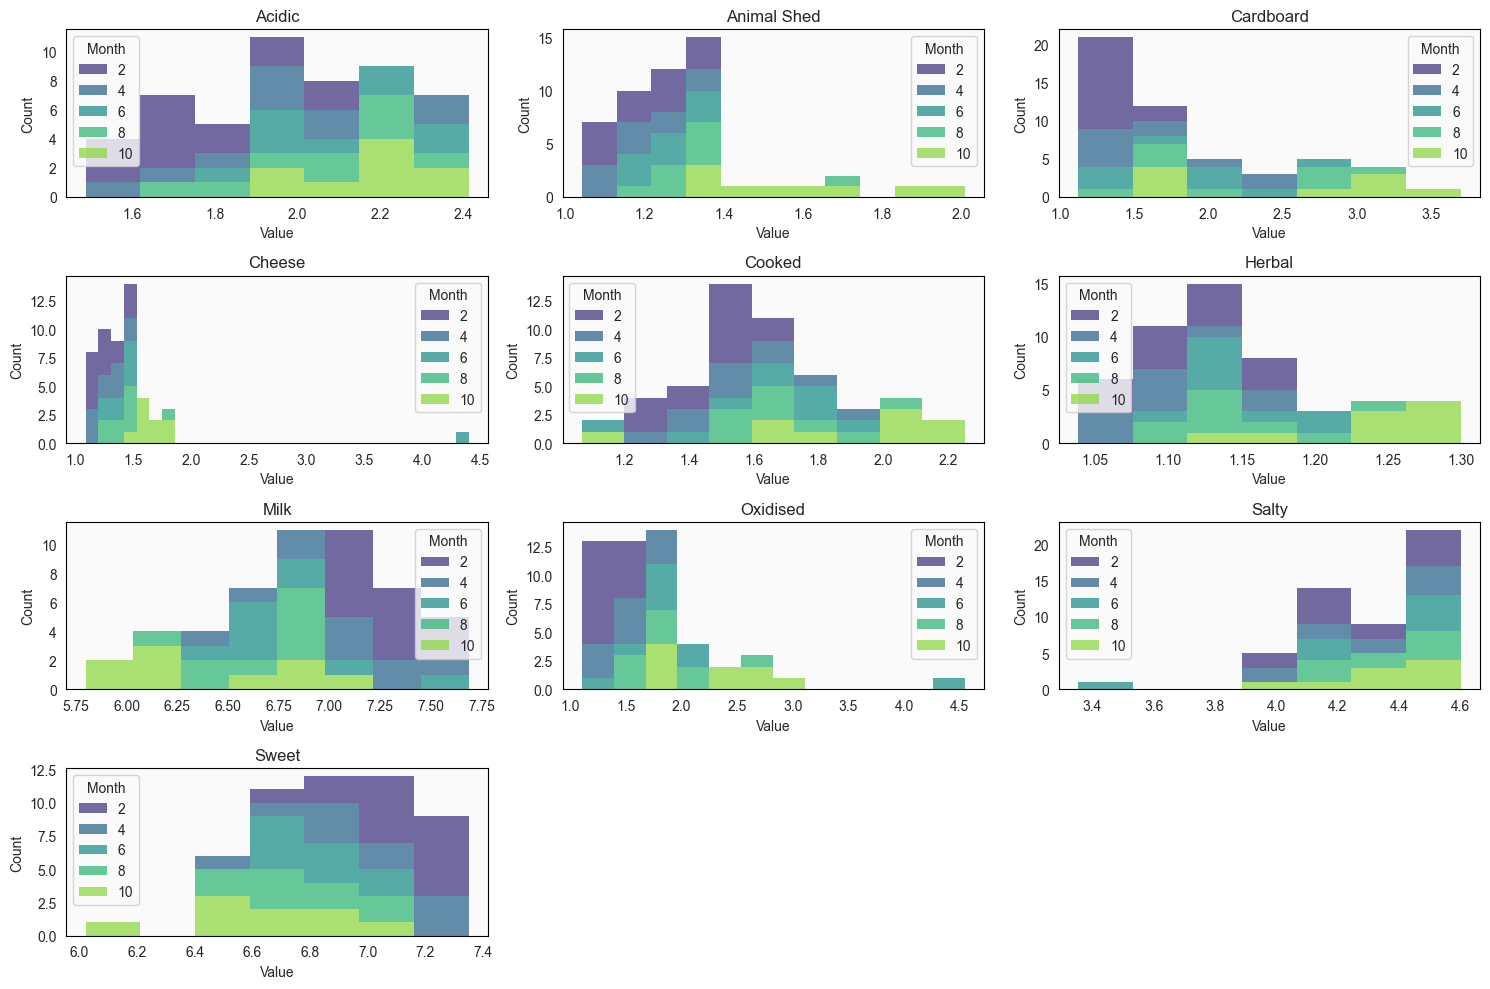

In [104]:
# Convert 'Month' to string (if it's not already categorical)
label_df['Month'] = label_df['Month'].astype(str)

# Melt the DataFrame to long format
long_df = pd.melt(label_df, id_vars=['Month'], value_vars=label_df.select_dtypes(include=np.number).columns,
                  var_name='Variable', value_name='Value')

# Determine the number of plots
numeric_columns = long_df['Variable'].unique()
num_plots = len(numeric_columns)

# Calculate the number of rows and columns for the subplots
cols = 3
rows = (num_plots + cols - 1) // cols

# Plot all the numeric columns in a series of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Plot stacked histograms for each numeric column, split by 'Month'
for i, col in enumerate(numeric_columns):
    # Filter the long DataFrame for the current variable
    subset = long_df[long_df['Variable'] == col]
    
    # Create a stacked histogram
    sns.histplot(
        subset,
        x='Value',
        hue='Month',
        ax=axs[i],
        multiple='stack',  # Stack the contributions of different 'Month' values
        palette='viridis',  # Use a color palette for better distinction
        edgecolor='none'    # Remove edges for cleaner visualization
    )
    axs[i].set_title(col)

# Hide unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [105]:
output_dir = Path('../data/processed/')
output_dir.mkdir(exist_ok=True)

label_df.to_csv(output_dir / f'label.csv')